In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the dataset
df = pd.read_csv("Fraud_Detection_Dataset1.csv")

# Filling missing values with the mean value of their respective columns
df.fillna(df.mean(), inplace=True)

# Filling missing values with the mean value of their respective columns
df.fillna(df.mean(), inplace=True)

# Checking for any remaining missing values (optional)
if df.isnull().values.any():
    print("Dataset has missing values. Consider alternative handling methods.")



# Normalizing the dataset features
features = df.columns.tolist()
features.remove('Response')  # Assuming 'Response' is the target variable
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Splitting the dataset
X = df[features]
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Address multicollinearity with PCA
pca = PCA()  # Initialize PCA without specifying components initially
pca.fit(X_train)  # Fit PCA on the training data

# Analyze variance explained by components (optional)
variance_ratio = pca.explained_variance_ratio_

# Choose a threshold for explained variance (e.g., 0.9)
threshold = 0.9  # Retain components explaining 90% of variance
n_components = np.where(variance_ratio.cumsum() >= threshold)[0][0] + 1

# Reduce dimensionality based on the threshold
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Filter out rows with target variable value 0.11603074 (optional, adjust as needed)
filtered_indices_train = y_train != 0.11603074
X_train_filtered = X_train_pca[filtered_indices_train]
y_train_filtered = y_train[filtered_indices_train]

filtered_indices_test = y_test != 0.11603074
X_test_filtered = X_test_pca[filtered_indices_test]
y_test_filtered = y_test[filtered_indices_test]

# Round the target variable to the nearest integer
y_train_rounded = y_train_filtered.round().astype(int)
y_test_rounded = y_test_filtered.round().astype(int)

# Instantiate and train the Random Forest model
best_model = RandomForestClassifier(n_estimators=100)  # Use 100 decision trees
best_model.fit(X_train_filtered, y_train_rounded)

# Predictions on filtered test set
predictions = best_model.predict(X_test_pca)




In [3]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test_rounded, predictions))
print("\nClassification Report:")
print(classification_report(y_test_rounded, predictions))

Confusion Matrix:
[[10573    87]
 [ 1133   238]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     10660
           1       0.73      0.17      0.28      1371

    accuracy                           0.90     12031
   macro avg       0.82      0.58      0.61     12031
weighted avg       0.88      0.90      0.87     12031



In [4]:
# Load test data (assuming same preprocessing steps)
testdata = pd.read_csv("Fraud_Detection_Test_nik.csv")
testdata.fillna(testdata.mean(), inplace=True)
testdata[features] = scaler.transform(testdata[features])
X_test_pca = pca.transform(testdata[features])

# Make predictions on test data
y_pred = best_model.predict(X_test_pca)

# Create a DataFrame with predictions
df_y = pd.DataFrame(y_pred, columns=['y_hat'])

# Display the first few rows of predictions
print(df_y.head())

   y_hat
0      0
1      0
2      0
3      0
4      0


In [5]:
df_y.to_csv('Team-8(2-random forest classifier).csv',index=False)

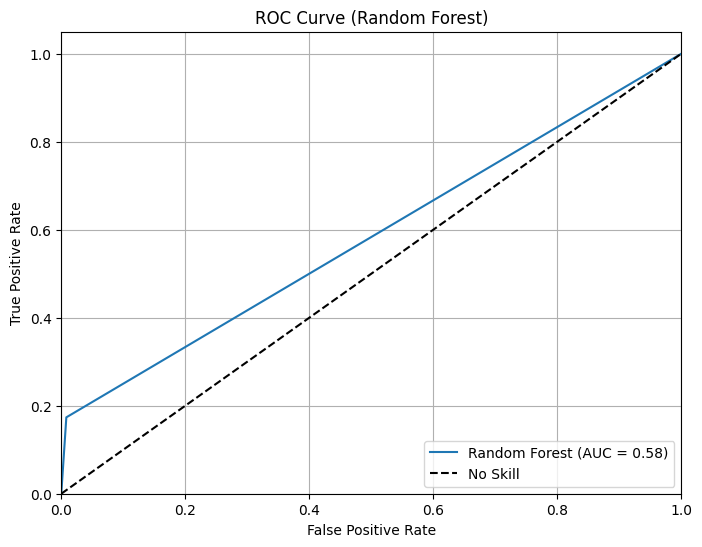

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# ROC Curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_rounded, predictions)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()